In [2]:
!pip install --user pixiedust_twitterdemo

In [3]:
import pixiedust
jarPath = "https://github.com/ibm-watson-data-lab/spark.samples/raw/master/dist/streaming-twitter-assembly-1.6.jar"
pixiedust.installPackage(jarPath)

Pixiedust database opened successfully


Package already installed: https://github.com/ibm-watson-data-lab/spark.samples/raw/master/dist/streaming-twitter-assembly-1.6.jar


In [4]:
%%scala
import org.apache.spark.streaming._
import com.ibm.cds.spark.samples.StreamingTwitter

val demo = com.ibm.cds.spark.samples.StreamingTwitter
demo.setConfig("twitter4j.oauth.consumerKey","UqkSGRGVJPgAkNiDsn7HZAl62")
demo.setConfig("twitter4j.oauth.consumerSecret", "rQQ8E9dq8hc3L4FbiTlvkdV1BKCg98vi09wEfACWTr2Bplt1gk")
demo.setConfig("twitter4j.oauth.accessToken","2416355779-3GtLUxo7UxMbQfDTKEQWQK95UN2Ib7RVC3UhD01")
demo.setConfig("twitter4j.oauth.accessTokenSecret", "vnjP3fvfGdTTvJkTfDOobbuHZwSGEH8yuTsViFykYXU5R")
demo.setConfig("watson.tone.url","https://gateway.watsonplatform.net/tone-analyzer/api")
demo.setConfig("watson.tone.password","MR7DViObD3IW")
demo.setConfig("watson.tone.username","7b5c3f47-9545-46fc-a4ef-1d421d727b31")


demo.startTwitterStreaming(sc, Seconds(900))

Starting twitter stream
Twitter stream started
Tweets are collected real-time and analyzed
To stop the streaming and start interacting with the data use: StreamingTwitter.stopTwitterStreaming
Receiver Started: TwitterReceiver-0
Batch started with 0 records
Batch completed with 0 records
Batch started with 131 records
Batch completed with 131 records
Batch started with 191 records
Batch completed with 191 records
Batch started with 181 records
Batch completed with 181 records
Batch started with 180 records
Batch completed with 180 records
Batch started with 167 records
Batch completed with 167 records
Batch started with 217 records
Batch completed with 217 records
Batch started with 176 records
Batch completed with 176 records
Batch started with 186 records
Batch completed with 186 records
Batch started with 171 records
Batch completed with 171 records
Batch started with 186 records
Batch completed with 186 records
Batch started with 200 records
Batch completed with 200 records
Batch st

In [5]:
%%scala
val demo = com.ibm.cds.spark.samples.StreamingTwitter
val (__sqlContext, __df) = demo.createTwitterDataFrames(sc)

A new table named tweets with 5962 records has been correctly created and can be accessed through the SQLContext variable
Here's the schema for tweets
root
 |-- author: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- date: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- text: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- Anger: double (nullable = true)
 |-- Disgust: double (nullable = true)
 |-- Fear: double (nullable = true)
 |-- Joy: double (nullable = true)
 |-- Sadness: double (nullable = true)
 |-- Analytical: double (nullable = true)
 |-- Confident: double (nullable = true)
 |-- Tentative: double (nullable = true)
 |-- Openness: double (nullable = true)
 |-- Conscientiousness: double (nullable = true)
 |-- Extraversion: double (nullable = true)
 |-- Agreeableness: double (nullable = true)
 |-- EmotionalRange: double (nullable = true)



In [6]:
tweets=__df
tweets.count()
display(tweets)

author,userid,date,lang,text,lat,long,Anger,Disgust,Fear,Joy,Sadness,Analytical,Confident,Tentative,Openness,Conscientiousness,Extraversion,Agreeableness,EmotionalRange
ReigningBengals1,ReigningRavens1,Mon Dec 04 21:06:59 CST 2017,en,@Chickers4 Wow good luck!,0.0,0.0,1.0,2.0,2.0,88.0,6.0,0.0,0.0,98.0,3.0,28.999999999999996,60.0,59.0,0.0
Reiki,JIMINVXE,Mon Dec 04 21:06:59 CST 2017,en,@CHANYEOLVXE Hadeh bro wkwk,0.0,0.0,4.0,8.0,3.0,57.99999999999999,31.0,0.0,0.0,0.0,11.0,28.000000000000004,54.0,60.0,0.0
NSH,namastayhere,Mon Dec 04 21:06:59 CST 2017,en,@ChadwikoRCC Really bad here's the play https://t.co/DiPPdyyoAh,0.0,0.0,28.000000000000004,19.0,21.0,1.0,66.0,84.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Andrew Gramling,stevensashle,Mon Dec 04 21:06:59 CST 2017,en,@JDaIey Gone.,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,8.0,24.0,40.0,52.0,0.0
Alli Berman,AlliBermanArt,Mon Dec 04 21:06:59 CST 2017,en,"RT @LolaLambchops: @sherryboswell @travelingmoms Tell them they need to get on that ;) Wear a GPS, Santa! #TMOM",0.0,0.0,11.0,14.000000000000002,19.0,42.0,26.0,0.0,0.0,0.0,16.0,45.0,45.0,56.00000000000001,0.0
will 20,Sinnxh,Mon Dec 04 21:06:59 CST 2017,en,"@shlonker no, 1 month probably",0.0,0.0,9.0,7.000000000000001,9.0,17.0,15.0,0.0,0.0,97.0,1.0,23.0,30.0,33.0,0.0
A. Yagoobian,Souuvenirs,Mon Dec 04 21:07:00 CST 2017,en,Me han quitado mi estabilidad emocional dos veces antes de un examen y creo que es cuando mejor me ha ido. Thanx now,0.0,0.0,3.0,9.0,9.0,63.0,3.0,0.0,0.0,0.0,13.0,13.0,46.0,60.0,0.0
JankyScorpio🤙🏾✨,NaeeThoo,Mon Dec 04 21:07:00 CST 2017,en,RT @_iKandyyy: You get a job and parents act like you making a six-figure salary.,0.0,0.0,18.0,24.0,6.0,28.000000000000004,40.0,0.0,0.0,28.999999999999996,17.0,24.0,92.0,65.0,0.0
Ganondorf,CalamtyGanon,Mon Dec 04 21:07:00 CST 2017,en,Tired Demon King noises. How long has he been asleep? https://t.co/5fahk5mU3T,0.0,0.0,39.0,3.0,56.99999999999999,1.0,33.0,0.0,0.0,0.0,3.0,6.0,10.0,48.0,0.0
Adult Club Locator,AdultClubLocate,Mon Dec 04 21:07:01 CST 2017,en,"Find Adult clubs in #LaGrange, #Georgia on https://t.co/JRj7wnUDFo",0.0,0.0,14.000000000000002,46.0,3.0,27.0,6.0,80.0,0.0,0.0,37.0,22.0,52.0,51.0,0.0


In [8]:
sentimentcount=[]
sentimentcount1=[]
sentimentcount2=[]
#For each sentiment, run a sql query that counts the number of tweets for which the sentiment score is greater than 50%
#Store the data in the array
for i, sentiment in enumerate(tweets.columns[-13:-8]):
    if(sentiment == "Anger"):
        sentimentcount.append(__sqlContext.sql("SELECT count(*) as sentCount FROM tweets where " +sentiment +"=Anger AND " +sentiment +">50")\
        .collect()[0].sentCount)
    elif(sentiment == "Joy"):
         sentimentcount1.append(__sqlContext.sql("SELECT count(*) as sentCount FROM tweets where " +sentiment +"=Joy AND " +sentiment +">50")\
        .collect()[0].sentCount)
    elif(sentiment == "Sadness"):
         sentimentcount2.append(__sqlContext.sql("SELECT count(*) as sentCount FROM tweets where " +sentiment +"=Sadness AND " +sentiment +">50")\
        .collect()[0].sentCount)
    
print (sentimentcount[0])
print (sentimentcount1[0])
print (sentimentcount2[0])

281
1394
592


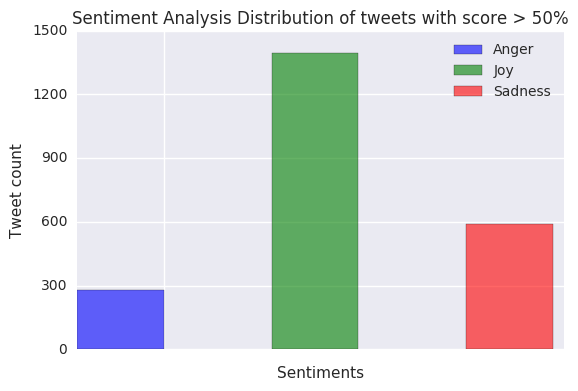

In [23]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

n_groups = 1
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.08
opacity = 0.6
 
rects1 = plt.bar(index, sentimentcount[0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Anger')
 
rects2 = plt.bar(index + 0.1 + bar_width, sentimentcount1[0], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Joy')

rects3 = plt.bar(index + 0.1+ bar_width+ 0.1+ bar_width, sentimentcount2[0], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Sadness')
plt.xlabel('Sentiments')
plt.ylabel('Tweet count')
plt.title('Sentiment Analysis Distribution of tweets with score > 50%',)
plt.xticks(index + bar_width, (''))
minor_ticks = np.arange(0, 1600, 300)
plt.yticks(minor_ticks)
plt.legend()
plt.tight_layout()
plt.show()